<a href="https://colab.research.google.com/github/mzaman202006/DA_project/blob/main/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action="ignore")
import tensorflow as tf

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CSE 6207 (N) : Data Analytics/Final/Data/IMDB.xlsx', sheet_name='All')
df['REVIEW'] =  df['REVIEW'].str.lower()

df.head(10)

,REVIEW,SENTIMENT
0,its somewhat ironic that a movie about time tr...,Neutral
1,"well, i've always known i was a little slow to...",Negative
2,a man on an international mission to save the ...,Negative
3,"as the first scene of tenet came to an end, i ...",Negative
4,its one hell of a complicated film. it will be...,Positive
5,i have honestly never felt so confused after w...,Negative
6,"background music is so loud, and most of the a...",Negative
7,listen we all know nolan swings for the fences...,Negative
8,"i am a big nolan and sci-fi fan, and there's n...",Negative
9,"on paper, tenet should have been as good as in...",Negative


In [ ]:
# Encoding Sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SENTIMENT"] = le.fit_transform(df["SENTIMENT"])
df.head(100)

,REVIEW,SENTIMENT
0,its somewhat ironic that a movie about time tr...,1
1,"well, i've always known i was a little slow to...",0
2,a man on an international mission to save the ...,0
3,"as the first scene of tenet came to an end, i ...",0
4,its one hell of a complicated film. it will be...,2
...,...,...
95,"great movie, a real love story! exciting and v...",2
96,i simply loved this movie. the acting was supe...,2
97,ok so some reviewers have downgraded it for th...,2
98,"well this movie has good costumes, scenery, an...",0


In [ ]:
df.SENTIMENT.unique()

array([1, 0, 2])

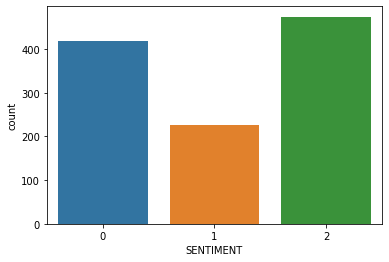

In [ ]:
sns.countplot(df["SENTIMENT"])

In [ ]:
df["SENTIMENT"].value_counts()

2    474
0    418
1    225
Name: SENTIMENT, dtype: int64

# creating function for cleaning data

In [ ]:

def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

In [ ]:
standardize_text(df,"REVIEW")

,REVIEW,SENTIMENT
0,its somewhat ironic that a movie about time tr...,1
1,"well, i've always known i was a little slow to...",0
2,a man on an international mission to save the ...,0
3,"as the first scene of tenet came to an end, i ...",0
4,its one hell of a complicated film it will be...,2
...,...,...
1112,when i see that nicolas cage appears in the ca...,1
1113,even cage's acting is bad compared to his prev...,0
1114,"light entertainment to full a 90 minute gap, n...",1
1115,first negative was that there are no subtitles...,0


In [ ]:
# importing libraries for bag of words model
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer=WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['REVIEW'][i])
    review = review.split()
    review=[word for word in review if not word in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
#applying tfidf on corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(corpus)
y = df["SENTIMENT"]

In [ ]:
# splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# deep learning model
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred[:5]

array([0, 2, 2, 0, 2])

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        94
           1       0.02      0.33      0.04         3
           2       0.94      0.73      0.82       127

    accuracy                           0.74       224
   macro avg       0.61      0.61      0.56       224
weighted avg       0.90      0.74      0.81       224

Accuracy Score of SVC: 73.66071428571429 %


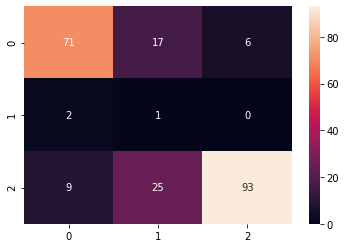

In [ ]:
# confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of SVC:", acc*100,"%")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Perform classification with MultinomialNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Perform classification with SVM, kernel=rbf
classifier_rbf = svm.SVC()
classifier_rbf.fit(X_train, y_train)
prediction_rbf = classifier_rbf.predict(X_test)
    
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)
prediction_linear = classifier_linear.predict(X_test)
  
# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC(max_iter=10000)
classifier_liblinear.fit(X_train, y_train)
prediction_liblinear = classifier_liblinear.predict(X_test)

In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction, y_test))
print( str(accuracy_score(prediction, y_test)))




Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       133
           1       0.00      0.00      0.00         3
           2       0.74      0.83      0.78        88

    accuracy                           0.68       224
   macro avg       0.57      0.47      0.51       224
weighted avg       0.86      0.68      0.74       224

0.6785714285714286


In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction_rbf, y_test))
print( str(accuracy_score(prediction_rbf, y_test)))


Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

           0       0.62      0.84      0.71        61
           1       0.02      1.00      0.05         1
           2       0.95      0.58      0.72       162

    accuracy                           0.65       224
   macro avg       0.53      0.81      0.49       224
weighted avg       0.86      0.65      0.72       224

0.6517857142857143


In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction_linear, y_test))
print( str(accuracy_score(prediction_linear, y_test)))


Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        95
           1       0.02      0.50      0.04         2
           2       0.93      0.72      0.81       127

    accuracy                           0.74       224
   macro avg       0.61      0.66      0.56       224
weighted avg       0.90      0.74      0.81       224

0.7366071428571429


In [ ]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print( classification_report(prediction_liblinear, y_test))
print( str(accuracy_score(prediction_liblinear, y_test)))


Results for NaiveBayes (MultinomialNB) 
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        94
           1       0.02      0.33      0.04         3
           2       0.94      0.73      0.82       127

    accuracy                           0.74       224
   macro avg       0.61      0.61      0.56       224
weighted avg       0.90      0.74      0.81       224

0.7366071428571429
